# Generate the `eprices` dataset


TODOs:
- [ ] Move `oldeprices.csv` to `raw/electricity_prices.xlsx`


In [1]:
datafilepath = "../datasets/eprices.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import norm

## Transform raw data

This dataset was previously used in non-tidy format, so we use the melt operation.

In [4]:
# oldfilepath = "../datasets/epriceswide.csv"
# oldeprices = pd.read_csv(oldfilepath)
# eprices = oldeprices.melt(var_name="end", value_name="price")
# eprices

In [5]:
# # SAVE TO DATAFILE
# eprices.to_csv(datafilepath, index=False)

In [6]:
# RELOAD FROM DATAFILE
eprices = pd.read_csv(datafilepath)
eprices

,end,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3
5,East,6.3
6,East,5.5
7,East,5.4
8,East,6.5
9,West,11.8


### Descriptive statistics checks

In [7]:
eprices.groupby("end").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
end                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

### Visual inspection

<AxesSubplot:xlabel='price', ylabel='Density'>

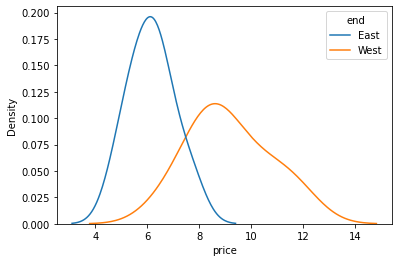

In [8]:
# sns.displot(x="price", hue="end", kind="kde", data=eprices)
sns.kdeplot(x="price", hue="end", data=eprices)

<AxesSubplot:xlabel='price', ylabel='end'>

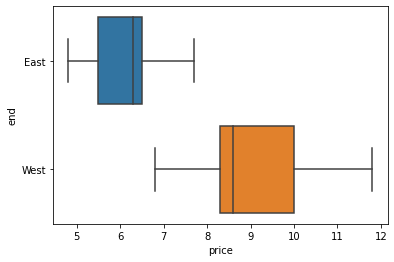

In [9]:
sns.boxplot(x="price", y="end", data=eprices)

## Tests

In [10]:
from scipy.stats import t as tdist

def calcdf(stdX, n, stdY, m):
    vX = stdX**2 / n
    vY = stdY**2 / m
    df = (vX+vY)**2 / (vX**2/(n-1) + vY**2/(m-1))
    return df

def ttest(sampleA, sampleB, pooled=False):
    """
    T-test to detect difference between means in two samples.
    """
    # 1. calculate the mean in each group
    meanA, meanB = np.mean(sampleA), np.mean(sampleB)
    # 2. calculate d, the observed difference between means
    d = meanA - meanB
    # 3. calculate the standard deviations in each group
    stdA, stdB = np.std(sampleA, ddof=1), np.std(sampleB, ddof=1)
    nA, nB = len(sampleA), len(sampleB)
    if pooled:
        # 4. compute the pooled variance and standard error
        var_pooled = ((nA-1)*stdA**2 + (nB-1)*stdB**2)/(nA + nB - 2)
        std_pooled = np.sqrt(var_pooled)
        stdD = std_pooled * np.sqrt(1/nA + 1/nB)
        # 5. degrees of freedom
        df = nA + nB - 2
    else:
        # 4'. compute the unpooled standard deviation of D
        stdD = np.sqrt(stdA**2/nA + stdB**2/nB)
        # 5'. use crazy formula for the degrees of freedom
        df = calcdf(stdA, nA, stdB, nB)
    # 6. compute the value of the t-statistic
    tstat = d / stdD
    # 7. compute the two-sided p-value for tstat
    pvalue = 2 * tdist(df).cdf(-abs(tstat))
    return tstat, pvalue

In [11]:
pricesE = eprices[eprices["end"]=="East"]["price"].values
pricesW = eprices[eprices["end"]=="West"]["price"].values

### Unpooled test (Welch test)

In [12]:
from scipy.stats import ttest_ind
ttest_ind(pricesW, pricesE, equal_var=False)

Ttest_indResult(statistic=5.022875513276464, pvalue=0.0002570338337217609)

In [13]:
ttest(pricesW, pricesE)

(5.022875513276464, 0.0002570338337217614)

### Pooled variance test

In [14]:
ttest_ind(pricesW, pricesE)

Ttest_indResult(statistic=5.022875513276465, pvalue=0.00012497067987678488)

In [15]:
ttest(pricesW, pricesE, pooled=True)

(5.022875513276464, 0.0001249706798767851)